In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import cv2

In [4]:
import io
import ipywidgets as widgets
from IPython.display import display
import PIL
from PIL import Image
import random

In [5]:
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

In [6]:
def preprocess_image(image):
    image = np.array(image)
    image = cv2.resize(image, IMAGE_SIZE)
    image = image / 255.0
    return image

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 16 images belonging to 2 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 4 images belonging to 2 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10
1/1 [==============================] - 11s 11s/step - loss: 0.7070 - accuracy: 0.5000 - val_loss: 0.6793 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 0.6570 - accuracy: 0.5000 - val_loss: 0.8650 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.8295 - accuracy: 0.5000 - val_loss: 0.5840 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 4s 4s/step - loss: 0.5468 - accuracy: 0.5000 - val_loss: 0.4320 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.3917 - accuracy: 0.9375 - val_loss: 0.3296 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.2875 - accuracy: 0.8750 - val_loss: 0.1850 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 0.1919 - accuracy: 0.8750 - val_loss: 0.0728 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=======================

In [12]:
model.save('leaf_health_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

1/1 [==============================] - 1s 582ms/step - loss: 0.4990 - accuracy: 0.7500
Validation Loss: 0.4990452527999878, Validation Accuracy: 0.75


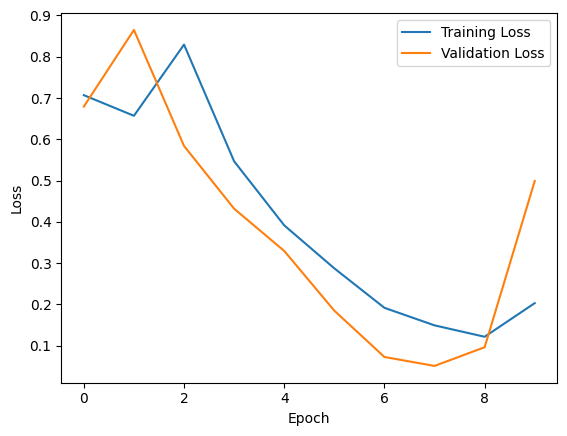

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

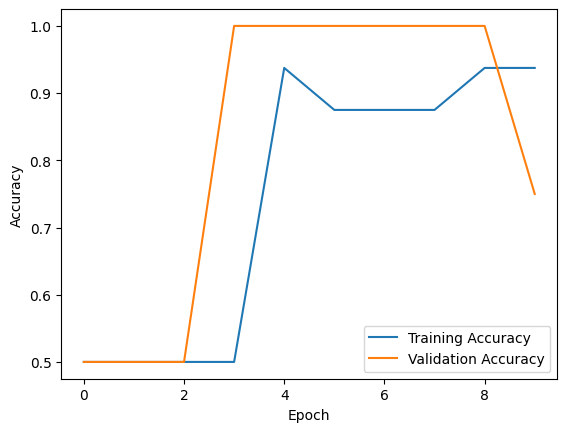

In [15]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
def on_image_upload(change):
    img = change['new']
    for filename, contents in img.items():
        pil_image = Image.open(io.BytesIO(contents['content']))
        img_array = preprocess_image(pil_image)
        img_array = np.expand_dims(img_array, axis=0)
        prediction = model.predict(img_array)[0]
        predicted_class = 'Unhealthy Leaf' if prediction > 0.5 else 'Healthy Leaf'

        plt.imshow(pil_image)
        plt.title(f'Predicted Class: {predicted_class}')
        plt.axis('off')
        plt.show()

In [17]:
upload_btn = widgets.FileUpload(accept='image/*', multiple=False)

In [18]:
upload_btn.observe(on_image_upload, names=['value'])

1/1 [==============================] - 0s 292ms/step


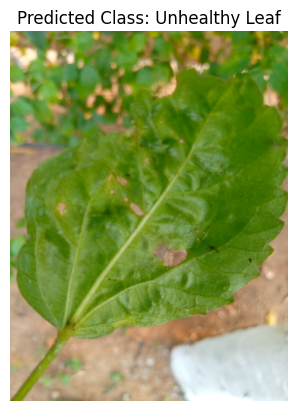

FileUpload(value={'007.jpg': {'metadata': {'name': '007.jpg', 'type': 'image/jpeg', 'size': 4935571, 'lastModi…

In [20]:
display(upload_btn)